<a href="https://colab.research.google.com/github/WKMANI/Data-Science-Exercise/blob/main/Data_Science_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and loading required Libraries

In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [ ]:
oaf = pd.read_csv('PostR1Dataset_joined_filtered_prepared.csv')
oaf

/home/kimani/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,33,34,35,36,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DimSeasonID,CountryName,SeasonName,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,...,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
0,13,Kenya,"2017, Long Rain",False,487378,78077,2591,45,7675.0,2017,...,0.0,9.0,False,132.0,True,600.0,313.636364,3450.0,0.449511,1.0
1,13,Kenya,"2017, Long Rain",False,1458872,172732,5556,99,6185.0,2017,...,0.0,6.0,False,132.0,True,250.0,142.500000,2280.0,0.368634,1.0
2,13,Kenya,"2017, Long Rain",False,1482338,133995,4497,78,6185.0,2017,...,0.0,6.0,False,132.0,True,1000.0,670.600000,3353.0,0.542118,1.0
3,13,Kenya,"2017, Long Rain",False,902050,183680,5965,107,14175.0,2017,...,0.0,9.0,False,132.0,True,2400.0,1112.500000,8900.0,0.627866,2.0
4,13,Kenya,"2017, Long Rain",False,3196771,115056,3934,64,16470.0,2017,...,0.0,12.0,False,132.0,True,1500.0,392.941176,6680.0,0.405586,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133609,13,Kenya,"2017, Long Rain",False,3675402,78090,2591,45,4470.0,2017,...,0.0,8.0,False,132.0,True,700.0,385.714286,2700.0,0.604027,1.0
2133610,13,Kenya,"2017, Long Rain",False,3075911,78090,2591,45,8975.0,2017,...,0.0,10.0,False,132.0,True,1000.0,460.000000,5060.0,0.563788,1.0
2133611,13,Kenya,"2017, Long Rain",False,1655005,84234,3014,49,6185.0,2017,...,0.0,6.0,False,132.0,True,500.0,425.000000,1700.0,0.274859,1.0
2133612,13,Kenya,"2017, Long Rain",False,1523154,78090,2591,45,9575.0,2017,...,0.0,9.0,False,132.0,True,1075.0,463.461538,6025.0,0.629243,1.0


In [ ]:
# Getting the number of columns and rows of the dataframe
oaf.shape

(2133614, 47)

## Exploratory Data Analysis

In [ ]:
oaf.tail()

,DimSeasonID,CountryName,SeasonName,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,...,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
2133609,13,Kenya,"2017, Long Rain",False,3675402,78090,2591,45,4470.0,2017,...,0.0,8.0,False,132.0,True,700.0,385.714286,2700.0,0.604027,1.0
2133610,13,Kenya,"2017, Long Rain",False,3075911,78090,2591,45,8975.0,2017,...,0.0,10.0,False,132.0,True,1000.0,460.000000,5060.0,0.563788,1.0
2133611,13,Kenya,"2017, Long Rain",False,1655005,84234,3014,49,6185.0,2017,...,0.0,6.0,False,132.0,True,500.0,425.000000,1700.0,0.274859,1.0
2133612,13,Kenya,"2017, Long Rain",False,1523154,78090,2591,45,9575.0,2017,...,0.0,9.0,False,132.0,True,1075.0,463.461538,6025.0,0.629243,1.0
2133613,13,Kenya,"2017, Long Rain",False,2146739,78090,2591,45,4975.0,2017,...,0.0,7.0,False,132.0,True,800.0,514.285714,3600.0,0.723618,1.0


In [ ]:
# Getting the ratio of True to False counts in the Repaid column
oaf.Repaid.value_counts()

True     1463684
False     669930
Name: Repaid, dtype: int64

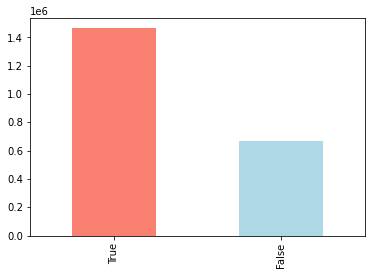

In [ ]:
# Plot of the True and False counts in the Repaid column
oaf.Repaid.value_counts().plot(kind = 'bar', color = ['salmon','lightblue']);

In [ ]:
# Dataframe information with the respective column datatypes
oaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133614 entries, 0 to 2133613
Data columns (total 47 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   DimSeasonID                     int64  
 1   CountryName                     object 
 2   SeasonName                      object 
 3   Facilitator                     bool   
 4   DimClientID                     int64  
 5   DimGroupID                      int64  
 6   DimSiteID                       int64  
 7   DimDistrictID                   int64  
 8   TotalCredit                     float64
 9   OperationalYear                 int64  
 10  CreatedDate                     object 
 11  HasPhone                        bool   
 12  Facilitator_SeasonNumber        float64
 13  Site_TotalCredit                float64
 14  Site_NumberOfFarmers            int64  
 15  Group_TotalCredit               float64
 16  Group_MaxSeasonNumber           int64  
 17  Group_NumberOfFarmers      

In [ ]:
# Identifying the columns with null values
oaf.isna().sum()

DimSeasonID                            0
CountryName                            0
SeasonName                             0
Facilitator                            0
DimClientID                            0
DimGroupID                             0
DimSiteID                              0
DimDistrictID                          0
TotalCredit                            0
OperationalYear                        0
CreatedDate                            0
HasPhone                               0
Facilitator_SeasonNumber           30264
Site_TotalCredit                       0
Site_NumberOfFarmers                   0
Group_TotalCredit                      0
Group_MaxSeasonNumber                  0
Group_NumberOfFarmers                  0
SeasonsAsFacilitator                   0
NumberOfPreviousSeasonsDropped    947230
SeasonNumber                           0
DimCountryID                           0
Fertilizer                           541
Travertine                           541
TreeKit         

In [ ]:
# Descriptive statistics of the Dataframe
oaf.describe(include = 'all')

,DimSeasonID,CountryName,SeasonName,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,...,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
count,2.133614e+06,2133614,2133614,2133614,2.133614e+06,2.133614e+06,2.133614e+06,2.133614e+06,2.133614e+06,2.133614e+06,...,2.133073e+06,2.133073e+06,2133427,2.133427e+06,2133614,2.110009e+06,2.110009e+06,2.133427e+06,2.133427e+06,2.133427e+06
unique,NaN,1,6,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,"2021, Long Rain",False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN
freq,NaN,2133614,571851,1865881,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1561576,NaN,1463684,NaN,NaN,NaN,NaN,NaN
mean,6.967323e+01,NaN,NaN,NaN,2.049270e+06,1.597306e+05,4.879190e+03,8.291871e+01,9.984512e+03,2.019339e+03,...,6.652337e-01,1.264705e+01,NaN,1.290374e+02,NaN,1.431205e+03,6.082576e+02,4.898085e+03,5.244615e-01,1.114883e+00
std,8.795778e+01,NaN,NaN,NaN,1.221750e+06,7.010325e+04,2.274452e+03,4.688406e+01,5.200578e+03,1.361516e+00,...,1.293056e+00,4.798322e+00,NaN,3.270490e+01,NaN,1.755532e+03,1.186698e+03,4.069823e+03,3.743968e-01,1.281183e+00
min,1.300000e+01,NaN,NaN,NaN,1.000000e+00,2.126000e+03,9.600000e+01,3.000000e+00,3.500000e+01,2.017000e+03,...,0.000000e+00,0.000000e+00,NaN,-2.320000e+02,NaN,-5.000000e+02,-7.500000e+02,-1.750000e+03,-2.272727e+00,0.000000e+00
25%,1.500000e+01,NaN,NaN,NaN,9.340850e+05,1.157360e+05,3.721000e+03,5.300000e+01,6.155000e+03,2.018000e+03,...,0.000000e+00,1.000000e+01,NaN,1.320000e+02,NaN,6.000000e+02,3.056667e+02,2.300000e+03,2.910267e-01,0.000000e+00
50%,1.700000e+01,NaN,NaN,NaN,2.166923e+06,1.736130e+05,4.998000e+03,8.300000e+01,9.065000e+03,2.019000e+03,...,0.000000e+00,1.200000e+01,NaN,1.320000e+02,NaN,1.000000e+03,4.602000e+02,3.800000e+03,4.511278e-01,1.000000e+00
75%,2.150000e+02,NaN,NaN,NaN,3.097718e+06,2.047940e+05,6.028000e+03,1.050000e+02,1.281500e+04,2.021000e+03,...,1.000000e+00,1.500000e+01,NaN,1.320000e+02,NaN,1.630000e+03,6.892857e+02,6.200000e+03,6.531882e-01,2.000000e+00


In [ ]:
oaf['TreeKit'].mode()

0    True
dtype: object

In [ ]:
oaf.columns

Index(['DimSeasonID', 'CountryName', 'SeasonName', 'Facilitator',
       'DimClientID', 'DimGroupID', 'DimSiteID', 'DimDistrictID',
       'TotalCredit', 'OperationalYear', 'CreatedDate', 'HasPhone',
       'Facilitator_SeasonNumber', 'Site_TotalCredit', 'Site_NumberOfFarmers',
       'Group_TotalCredit', 'Group_MaxSeasonNumber', 'Group_NumberOfFarmers',
       'SeasonsAsFacilitator', 'NumberOfPreviousSeasonsDropped',
       'SeasonNumber', 'DimCountryID', 'Fertilizer', 'Travertine', 'TreeKit',
       'Training', 'Solar', 'Insurance', 'Safety', 'PostHarvest', 'Maize',
       'JiT', 'InputKGs', 'VeggieSeed', 'BeanSeed', 'Chicken', 'Phone',
       'NumberUndeliveredInput', 'NumberDeliveredInput', 'Active',
       'DaysToSeasonEnd', 'Repaid', 'MaximumPaymentAmount',
       'AveragePaymentAmount', 'TotalPaid', 'PercentagePaid',
       'DistinctRepaymentPhoneNumbers'],
      dtype='object')

In [ ]:
oaf[['Facilitator','HasPhone','Fertilizer', 'Travertine', 'TreeKit',
       'Training', 'Solar', 'Insurance', 'Safety', 'PostHarvest', 'Maize',
       'JiT', 'VeggieSeed', 'BeanSeed', 'Chicken']].astype('bool')

,Facilitator,HasPhone,Fertilizer,Travertine,TreeKit,Training,Solar,Insurance,Safety,PostHarvest,Maize,JiT,VeggieSeed,BeanSeed,Chicken
0,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False
1,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
2,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
3,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False
4,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133609,False,True,True,False,True,False,False,False,False,True,True,False,False,False,False
2133610,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False
2133611,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
2133612,False,True,True,False,True,False,False,False,False,True,True,False,False,False,False


In [ ]:
oaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133614 entries, 0 to 2133613
Data columns (total 47 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   DimSeasonID                     int64  
 1   CountryName                     object 
 2   SeasonName                      object 
 3   Facilitator                     bool   
 4   DimClientID                     int64  
 5   DimGroupID                      int64  
 6   DimSiteID                       int64  
 7   DimDistrictID                   int64  
 8   TotalCredit                     float64
 9   OperationalYear                 int64  
 10  CreatedDate                     object 
 11  HasPhone                        bool   
 12  Facilitator_SeasonNumber        float64
 13  Site_TotalCredit                float64
 14  Site_NumberOfFarmers            int64  
 15  Group_TotalCredit               float64
 16  Group_MaxSeasonNumber           int64  
 17  Group_NumberOfFarmers      

<AxesSubplot:xlabel='Repaid'>

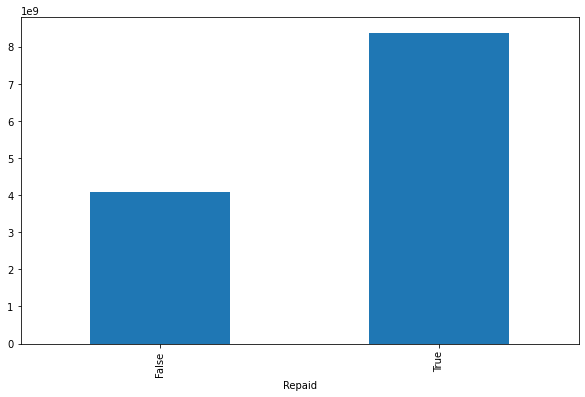

In [ ]:
# Comparing the Repaid Column with the TotalCredit column
oaf.groupby('Repaid').sum()['TotalCredit'].plot.bar(figsize=(10,6))

<AxesSubplot:xlabel='Repaid'>

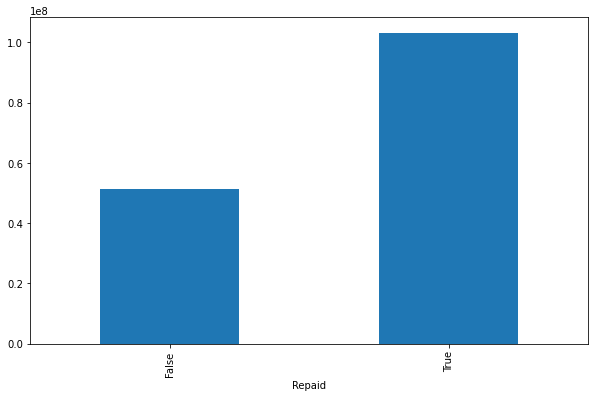

In [ ]:
oaf.groupby('Repaid').sum()['DaysToSeasonEnd'].plot.bar(figsize=(10,6))

In [ ]:
# SeasonName column compared to Repaid column
oaf.SeasonName.value_counts()

2021, Long Rain     571851
2020, Long Rain     486793
2019, Long Rain     425825
2018, Long Rain     390323
2017, Long Rain     258635
2017, Short Rain       187
Name: SeasonName, dtype: int64

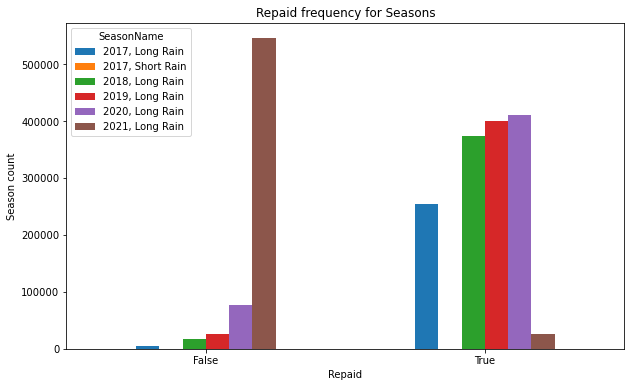

In [ ]:
# Visualization of the comparison between the SeasonName with the Repaid column
pd.crosstab(oaf.Repaid,oaf.SeasonName).plot(kind = 'bar', figsize = (10,6))
plt.title('Repaid frequency for Seasons')
plt.xlabel('Repaid')
plt.ylabel('Season count')
plt.xticks(rotation = 0);

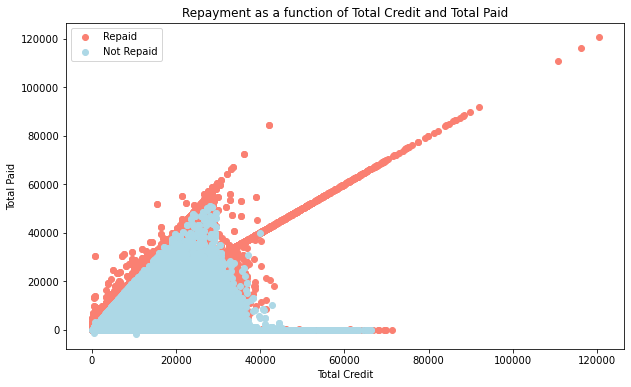

In [ ]:
plt.figure(figsize = (10,6))

#scatter for positive examples
plt.scatter(oaf.TotalCredit[oaf.Repaid==True],oaf.TotalPaid[oaf.Repaid==True],c='salmon')

#scatter for negative examples
plt.scatter(oaf.TotalCredit[oaf.Repaid==False],oaf.TotalPaid[oaf.Repaid==False], c='lightblue');

plt.title('Repayment as a function of Total Credit and Total Paid')
plt.xlabel('Total Credit')
plt.ylabel('Total Paid')
plt.legend(["Repaid","Not Repaid"]);

In [ ]:
oaf.TotalCredit[oaf.Repaid==True].max()

120502.0

In [ ]:
oaf.TotalPaid[oaf.Repaid==True].max()

120502.0

<AxesSubplot:ylabel='Frequency'>

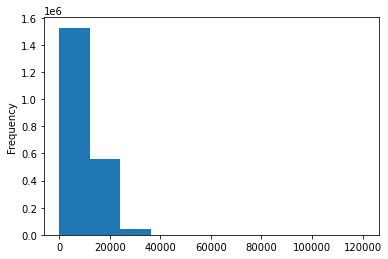

In [ ]:
# Histogram of TotalCredit Column
oaf.TotalCredit.plot.hist()

<AxesSubplot:ylabel='Frequency'>

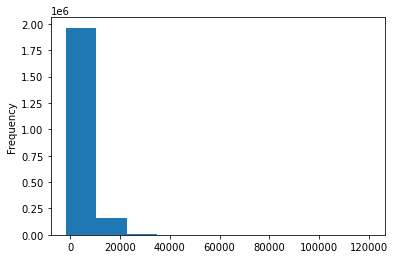

In [ ]:
# Histogram of TotalPaid Column
oaf.TotalPaid.plot.hist()

<AxesSubplot:ylabel='Frequency'>

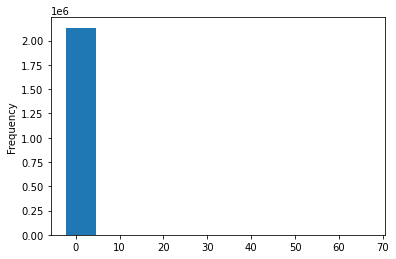

In [ ]:
# Histogram of PercentagePaid
oaf.PercentagePaid.plot.hist()

In [ ]:
oaf.Group_NumberOfFarmers.median()

11.0

<AxesSubplot:>

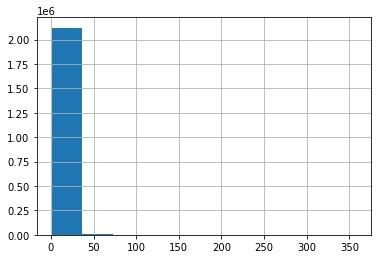

In [ ]:
oaf.Group_NumberOfFarmers.hist()

In [ ]:
oaf[['PercentagePaid']].value_counts(ascending = True)

PercentagePaid
-2.272727             1
 0.495631             1
 0.495625             1
 0.495625             1
 0.495624             1
                  ...  
 0.318218           384
 0.279590           390
 0.719424           412
 2.000000          8003
 1.000000         24920
Length: 627145, dtype: int64

In [ ]:
# Comparison view of some of the columns when Repaid is True
oaf[oaf['Repaid']==True][['TotalCredit','TotalPaid','PercentagePaid','MaximumPaymentAmount','Repaid']]

,TotalCredit,TotalPaid,PercentagePaid,MaximumPaymentAmount,Repaid
0,7675.0,3450.0,0.449511,600.0,True
2,6185.0,3353.0,0.542118,1000.0,True
4,16470.0,6680.0,0.405586,1500.0,True
6,17465.0,4650.0,0.266247,1000.0,True
7,4285.0,2000.0,0.466744,1000.0,True
...,...,...,...,...,...
2133602,6575.0,3400.0,0.517110,1500.0,True
2133603,4750.0,4750.0,1.000000,1400.0,True
2133605,7275.0,3830.0,0.526460,600.0,True
2133606,10985.0,2850.0,0.259445,500.0,True


In [ ]:
# Comparison view of some of the columns when Repaid is False
oaf[oaf['Repaid']==False][['TotalCredit','TotalPaid','PercentagePaid','MaximumPaymentAmount','Repaid']]

,TotalCredit,TotalPaid,PercentagePaid,MaximumPaymentAmount,Repaid
284,14650.0,4950.0,0.337884,1000.0,False
352,6145.0,2200.0,0.358015,500.0,False
414,14175.0,6000.0,0.423280,2100.0,False
458,9320.0,2000.0,0.214592,600.0,False
488,17875.0,4870.0,0.272448,505.0,False
...,...,...,...,...,...
2132041,12670.0,2000.0,0.157853,800.0,False
2132044,5266.0,6208.0,1.178883,2000.0,False
2132045,5266.0,6208.0,1.178883,2000.0,False
2132114,10385.0,1670.0,0.160809,300.0,False


In [ ]:
oaf.columns

Index(['DimSeasonID', 'CountryName', 'SeasonName', 'Facilitator',
       'DimClientID', 'DimGroupID', 'DimSiteID', 'DimDistrictID',
       'TotalCredit', 'OperationalYear', 'CreatedDate', 'HasPhone',
       'Facilitator_SeasonNumber', 'Site_TotalCredit', 'Site_NumberOfFarmers',
       'Group_TotalCredit', 'Group_MaxSeasonNumber', 'Group_NumberOfFarmers',
       'SeasonsAsFacilitator', 'NumberOfPreviousSeasonsDropped',
       'SeasonNumber', 'DimCountryID', 'Fertilizer', 'Travertine', 'TreeKit',
       'Training', 'Solar', 'Insurance', 'Safety', 'PostHarvest', 'Maize',
       'JiT', 'InputKGs', 'VeggieSeed', 'BeanSeed', 'Chicken', 'Phone',
       'NumberUndeliveredInput', 'NumberDeliveredInput', 'Active',
       'DaysToSeasonEnd', 'Repaid', 'MaximumPaymentAmount',
       'AveragePaymentAmount', 'TotalPaid', 'PercentagePaid',
       'DistinctRepaymentPhoneNumbers'],
      dtype='object')

Text(0, 0.5, 'Repayment Frequency')

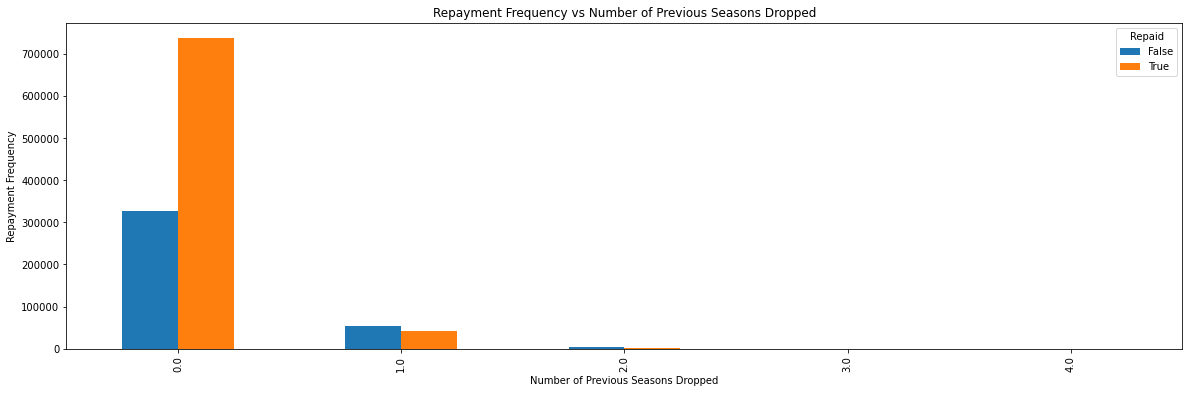

In [ ]:
# Comparison of Number of Previous Seasons Dropped and Repaid Column
pd.crosstab(oaf.NumberOfPreviousSeasonsDropped,oaf.Repaid).plot(kind='bar',figsize=(20,6))
plt.title('Repayment Frequency vs Number of Previous Seasons Dropped')
plt.xlabel('Number of Previous Seasons Dropped')
plt.ylabel('Repayment Frequency')

Text(0, 0.5, 'Repayment Frequency')

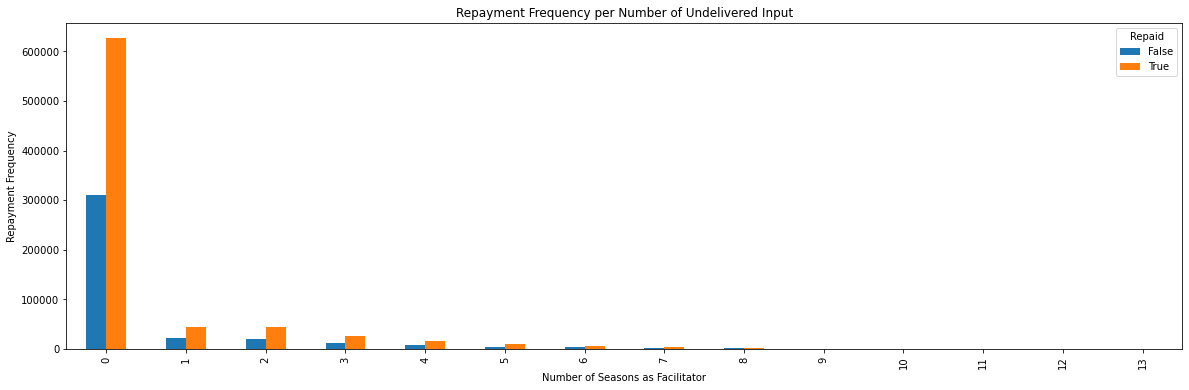

In [ ]:
# Comparison of Seasons as Facilitor and Repaid Column
pd.crosstab(oaf.SeasonsAsFacilitator,oaf.Repaid).plot(kind='bar',figsize=(20,6))
plt.title('Repayment Frequency vs Seasons as Facilitator')
plt.xlabel('Number of Seasons as Facilitator')
plt.ylabel('Repayment Frequency')

Text(0, 0.5, 'Repayment Frequency')

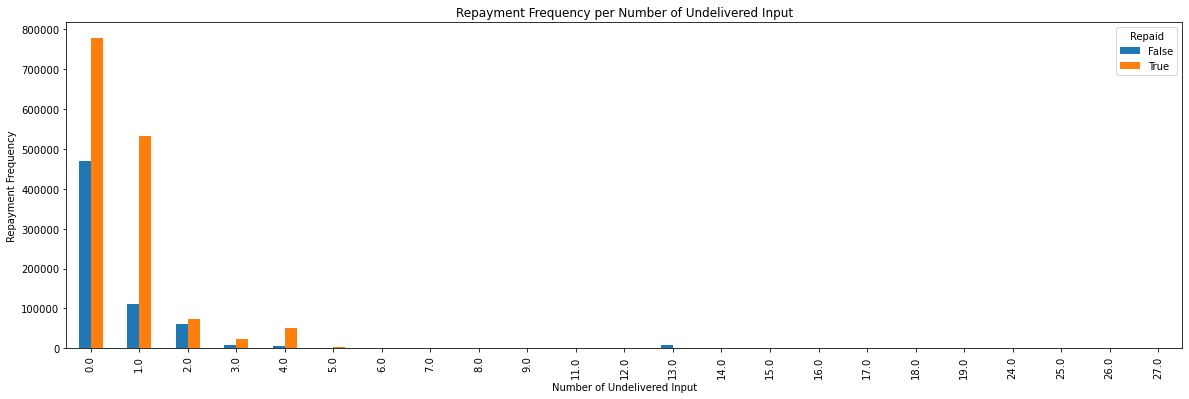

In [ ]:
# Comparison between NumberUndeliveredInput column and Repaid column
pd.crosstab(oaf.NumberUndeliveredInput,oaf.Repaid).plot(kind='bar',figsize=(20,6))
plt.title('Repayment Frequency per Number of Undelivered Input')
plt.xlabel('Number of Undelivered Input')
plt.ylabel('Repayment Frequency')

Text(0, 0.5, 'Repayment Frequency')

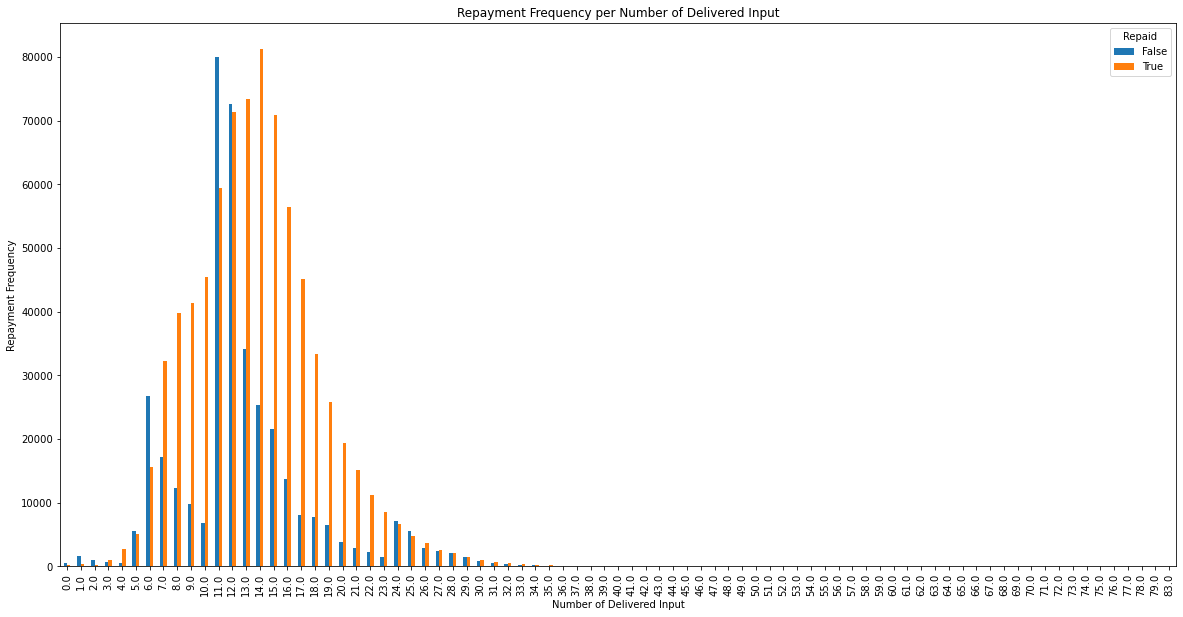

In [ ]:
# Comparison between NumberDeliveredInput column and Repaid column
pd.crosstab(oaf.NumberDeliveredInput,oaf.Repaid).plot(kind = 'bar',figsize = (20,10))
plt.title('Repayment Frequency per Number of Delivered Input')
plt.xlabel('Number of Delivered Input')
plt.ylabel('Repayment Frequency')

<AxesSubplot:>

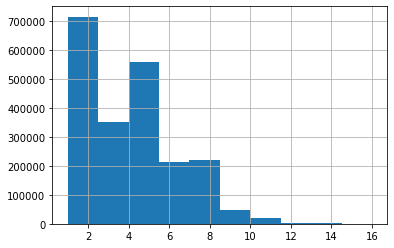

In [ ]:
oaf.Group_MaxSeasonNumber.hist()

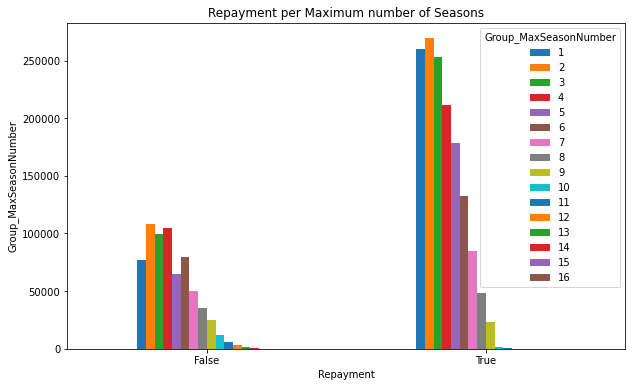

In [ ]:
pd.crosstab(oaf.Repaid,oaf.Group_MaxSeasonNumber).plot(kind='bar',figsize=(10,6))
plt.title('Repayment per Maximum number of Seasons')
plt.xlabel('Repayment')
plt.ylabel('Group_MaxSeasonNumber')
plt.xticks(rotation=0);

In [ ]:

oaf[oaf['Repaid']==False][['Group_MaxSeasonNumber','Group_NumberOfFarmers','PercentagePaid','MaximumPaymentAmount','Repaid']]

In [ ]:
# Correlation Matrix

oaf.corr()

,DimSeasonID,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,HasPhone,Facilitator_SeasonNumber,...,InputKGs,NumberUndeliveredInput,NumberDeliveredInput,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
DimSeasonID,1.000000,-0.021340,2.664120e-01,0.221033,0.138070,0.078590,-0.019799,0.752290,-6.262421e-05,0.236750,...,-0.053322,-0.001434,-0.096915,0.053605,-0.835623,-0.041427,-0.026678,-0.071369,-0.034753,0.541098
Facilitator,-0.021340,1.000000,-3.393672e-02,0.016402,0.007228,0.005326,0.153402,-0.006904,-9.499697e-05,-0.042910,...,0.005094,0.242654,0.306799,0.019733,0.015868,0.016632,-0.029279,0.104457,0.004309,0.036679
DimClientID,0.266412,-0.033937,1.000000e+00,0.167202,0.128485,0.101568,-0.052963,0.200011,4.646071e-07,-0.021272,...,-0.012751,-0.018262,-0.081254,0.040047,-0.227947,-0.045727,-0.038250,-0.037766,0.002365,0.152222
DimGroupID,0.221033,0.016402,1.672020e-01,1.000000,0.799908,0.649504,0.025628,0.357823,1.834270e-04,-0.437315,...,0.000181,-0.034049,-0.022188,-0.091431,-0.270812,0.013560,0.019183,-0.130066,-0.157946,0.228719
DimSiteID,0.138070,0.007228,1.284851e-01,0.799908,1.000000,0.802508,0.059749,0.247064,-9.871260e-05,-0.420546,...,0.001759,-0.010757,-0.019900,-0.134123,-0.209540,0.022057,0.008264,-0.131795,-0.191454,0.175854
DimDistrictID,0.078590,0.005326,1.015681e-01,0.649504,0.802508,1.000000,0.063406,0.173108,-2.073473e-04,-0.417291,...,0.020203,0.006212,-0.032040,-0.167381,-0.154455,0.043274,0.020859,-0.107048,-0.178586,0.108048
TotalCredit,-0.019799,0.153402,-5.296277e-02,0.025628,0.059749,0.063406,1.000000,-0.018495,-5.628067e-04,0.018174,...,0.032155,0.106088,0.368056,-0.124653,-0.012710,0.421346,0.276611,0.494387,-0.174023,0.014927
OperationalYear,0.752290,-0.006904,2.000114e-01,0.357823,0.247064,0.173108,-0.018495,1.000000,2.604624e-04,0.242817,...,-0.017205,-0.070075,0.035996,0.001673,-0.677589,-0.037024,-0.021389,-0.103310,-0.071279,0.577327
HasPhone,-0.000063,-0.000095,4.646071e-07,0.000183,-0.000099,-0.000207,-0.000563,0.000260,1.000000e+00,-0.000417,...,0.000186,-0.000669,-0.000403,-0.000164,-0.000110,-0.000038,0.000059,0.000169,0.000585,0.000970
Facilitator_SeasonNumber,0.236750,-0.042910,-2.127194e-02,-0.437315,-0.420546,-0.417291,0.018174,0.242817,-4.170292e-04,1.000000,...,0.004873,-0.020632,0.076182,0.066281,-0.129063,0.018770,0.029112,0.135140,0.136570,0.136875


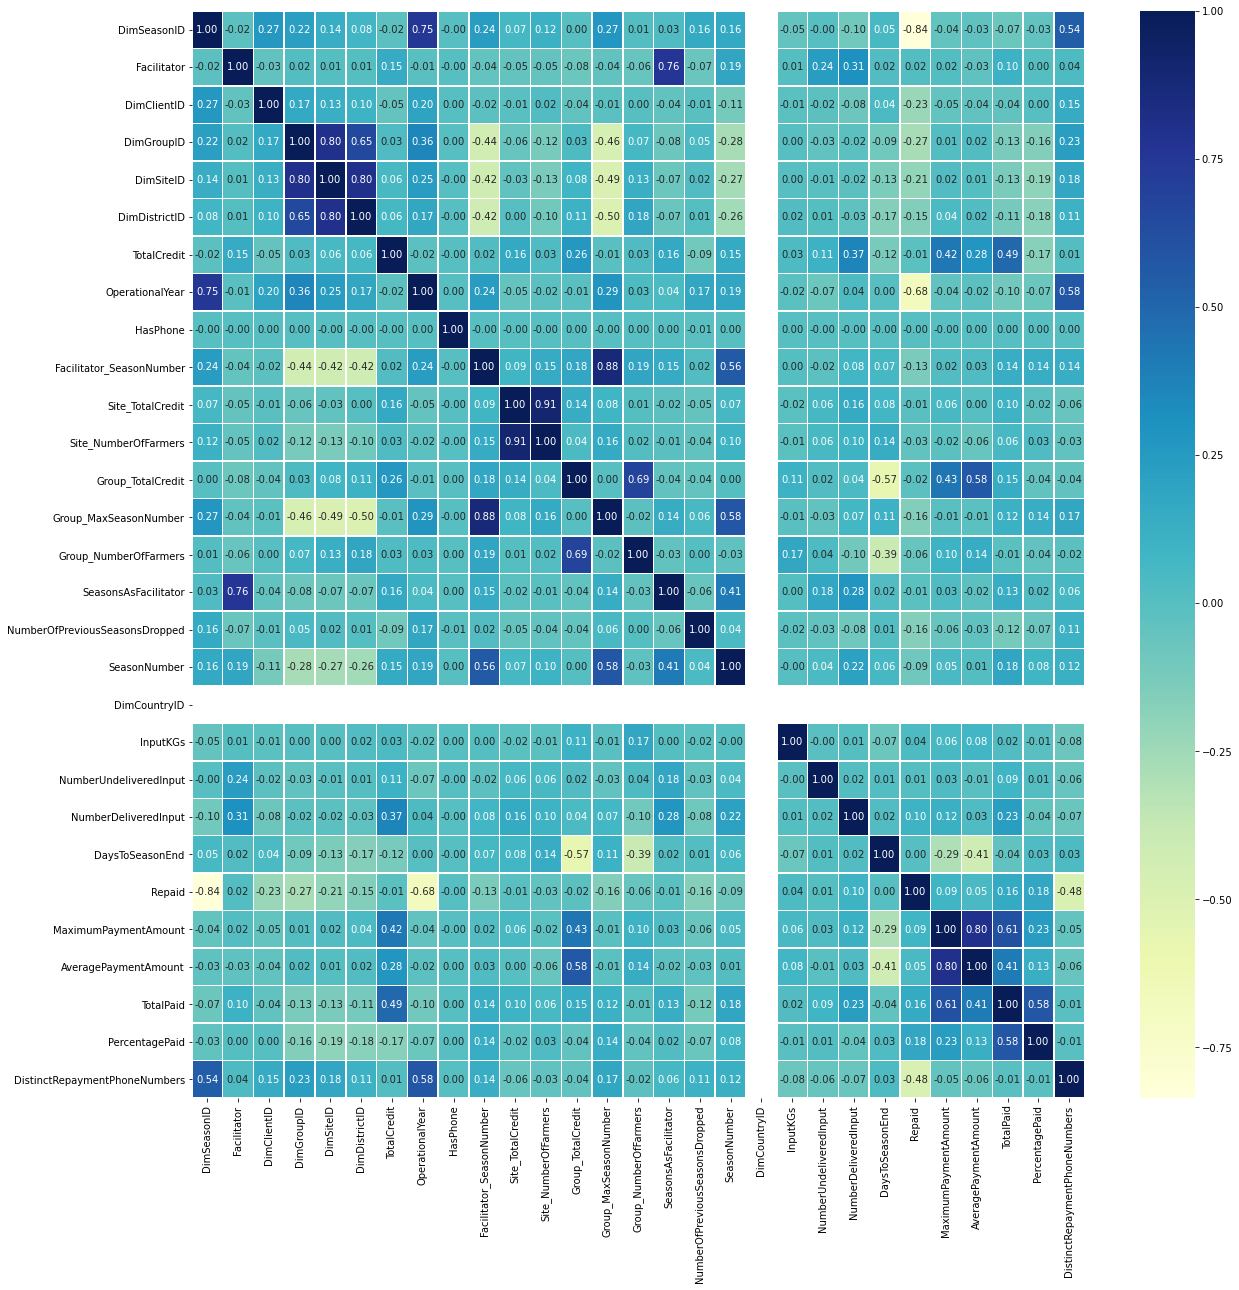

In [ ]:
# Correlation Matrix using seaborn heatmap
corr_matrix = oaf.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True,linewidths = 0.5, fmt = '.2f', cmap = 'YlGnBu')

## Modelling

In [ ]:
oaf.head()

,DimSeasonID,CountryName,SeasonName,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,...,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
0,13,Kenya,"2017, Long Rain",False,487378,78077,2591,45,7675.0,2017,...,0.0,9.0,False,132.0,True,600.0,313.636364,3450.0,0.449511,1.0
1,13,Kenya,"2017, Long Rain",False,1458872,172732,5556,99,6185.0,2017,...,0.0,6.0,False,132.0,True,250.0,142.500000,2280.0,0.368634,1.0
2,13,Kenya,"2017, Long Rain",False,1482338,133995,4497,78,6185.0,2017,...,0.0,6.0,False,132.0,True,1000.0,670.600000,3353.0,0.542118,1.0
3,13,Kenya,"2017, Long Rain",False,902050,183680,5965,107,14175.0,2017,...,0.0,9.0,False,132.0,True,2400.0,1112.500000,8900.0,0.627866,2.0
4,13,Kenya,"2017, Long Rain",False,3196771,115056,3934,64,16470.0,2017,...,0.0,12.0,False,132.0,True,1500.0,392.941176,6680.0,0.405586,1.0


In [ ]:
oaf.columns

Index(['DimSeasonID', 'CountryName', 'SeasonName', 'Facilitator',
       'DimClientID', 'DimGroupID', 'DimSiteID', 'DimDistrictID',
       'TotalCredit', 'OperationalYear', 'CreatedDate', 'HasPhone',
       'Facilitator_SeasonNumber', 'Site_TotalCredit', 'Site_NumberOfFarmers',
       'Group_TotalCredit', 'Group_MaxSeasonNumber', 'Group_NumberOfFarmers',
       'SeasonsAsFacilitator', 'NumberOfPreviousSeasonsDropped',
       'SeasonNumber', 'DimCountryID', 'Fertilizer', 'Travertine', 'TreeKit',
       'Training', 'Solar', 'Insurance', 'Safety', 'PostHarvest', 'Maize',
       'JiT', 'InputKGs', 'VeggieSeed', 'BeanSeed', 'Chicken', 'Phone',
       'NumberUndeliveredInput', 'NumberDeliveredInput', 'Active',
       'DaysToSeasonEnd', 'Repaid', 'MaximumPaymentAmount',
       'AveragePaymentAmount', 'TotalPaid', 'PercentagePaid',
       'DistinctRepaymentPhoneNumbers'],
      dtype='object')

In [ ]:
oaf.dropna(inplace=True)

In [ ]:
oaf.Repaid.value_counts()

True     781284
False    387479
Name: Repaid, dtype: int64

In [ ]:
# Split the data into X and y
X = oaf.drop(['SeasonName','CreatedDate','Repaid','CountryName','DimSeasonID','DimClientID', 'DimGroupID', 'DimSiteID', 'DimDistrictID', 'DimCountryID'], axis = 1)
y = oaf['Repaid']

In [ ]:
X

,SeasonName,Facilitator,TotalCredit,OperationalYear,CreatedDate,HasPhone,Facilitator_SeasonNumber,Site_TotalCredit,Site_NumberOfFarmers,Group_TotalCredit,...,Phone,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
0,"2017, Long Rain",False,7675.0,2017,Oct 5 2016 8:50AM,True,3.0,2718100.0,304,115340.0,...,False,0.0,9.0,False,132.0,600.0,313.636364,3450.0,0.449511,1.0
1,"2017, Long Rain",False,6185.0,2017,Oct 11 2016 2:13PM,True,2.0,1574425.0,172,122620.0,...,False,0.0,6.0,False,132.0,250.0,142.500000,2280.0,0.368634,1.0
2,"2017, Long Rain",False,6185.0,2017,Oct 19 2016 3:10PM,True,4.0,1656995.0,188,58975.0,...,False,0.0,6.0,False,132.0,1000.0,670.600000,3353.0,0.542118,1.0
3,"2017, Long Rain",False,14175.0,2017,Oct 15 2016 1:50PM,True,1.0,3129120.0,259,147935.0,...,False,0.0,9.0,False,132.0,2400.0,1112.500000,8900.0,0.627866,2.0
4,"2017, Long Rain",False,16470.0,2017,Oct 19 2016 10:32AM,True,3.0,2824215.0,278,88475.0,...,False,0.0,12.0,False,132.0,1500.0,392.941176,6680.0,0.405586,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133609,"2017, Long Rain",False,4470.0,2017,Sep 28 2016 8:38AM,True,2.0,2718100.0,304,91030.0,...,False,0.0,8.0,False,132.0,700.0,385.714286,2700.0,0.604027,1.0
2133610,"2017, Long Rain",False,8975.0,2017,Sep 28 2016 8:48AM,True,2.0,2718100.0,304,91030.0,...,False,0.0,10.0,False,132.0,1000.0,460.000000,5060.0,0.563788,1.0
2133611,"2017, Long Rain",False,6185.0,2017,Sep 29 2016 8:31AM,True,3.0,1885180.0,187,91405.0,...,False,0.0,6.0,False,132.0,500.0,425.000000,1700.0,0.274859,1.0
2133612,"2017, Long Rain",False,9575.0,2017,Sep 28 2016 8:21AM,True,2.0,2718100.0,304,91030.0,...,False,0.0,9.0,False,132.0,1075.0,463.461538,6025.0,0.629243,1.0


In [ ]:
y

0          True
1          True
2          True
3          True
4          True
           ... 
2133609    True
2133610    True
2133611    True
2133612    True
2133613    True
Name: Repaid, Length: 2133614, dtype: bool

In [ ]:
# Split the data into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.3))

In [ ]:
# Shape of the train and test sets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((818134, 37), (350629, 37), (818134,), (350629,))

### Building a machine learning model
### Experimenting with 3 machine learning models
1. Logistics regression
2. K-Nearest Neighbor
3. Random Forest Classifier

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different scikit learn models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_training : training labels
    y_test : testing labels
    """
    # Set a random seed - to make sure our results are reproducible
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'Logistic Regression': 0.6750012121073842,
 'KNN': 0.774864600475146,
 'Random Forest': 0.9719646692087648}

<AxesSubplot:>

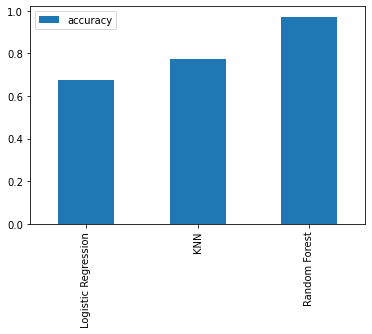

In [ ]:
# Comparing models
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

### Hyperparameter Tuning for KNC (Second Highest Scoring Model)

In [ ]:
# Tuning KNN

train_scores = []
test_scores = []

# create a list of different values for n neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the algorithm
    knn.fit(X_train, y_train)
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
train_scores

[0.9999987777063415,
 0.9007852014462179,
 0.8945453923195956,
 0.8599434811412311,
 0.8534078769492528,
 0.8374911689283173,
 0.8308260016085385,
 0.8212248849210521,
 0.8157208965768444,
 0.8092256280755964,
 0.8039074283674802,
 0.7999080835168811,
 0.7949321260331437,
 0.7922015220000636,
 0.7872157861670582,
 0.7851880009876133,
 0.7803269391077745,
 0.7791070900365955,
 0.7747117220406438,
 0.7742545842123661]

In [ ]:
test_scores

[0.802991195822365,
 0.7519743090274906,
 0.7801550927048247,
 0.7590302000119785,
 0.774864600475146,
 0.7612176973382122,
 0.7671584495292745,
 0.7586109534579285,
 0.7626294459385846,
 0.7560555458903856,
 0.7579207652533019,
 0.7534744701664723,
 0.7543300753788192,
 0.750998919085415,
 0.7510559594329048,
 0.7486374486993375,
 0.7480214129464476,
 0.7459993326279344,
 0.7459508483325681,
 0.7438831357360629]

Max model score on the data: 80.30%


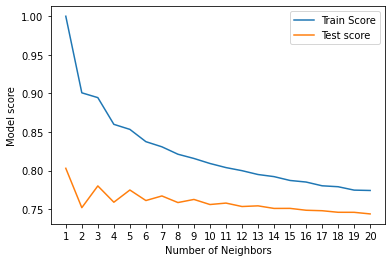

In [ ]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Max model score on the data: {max(test_scores)*100:.2f}%')
#It is clear that by increasing the number neighbors there is a drop in accuracy score of the KNN model

#### Evaluating the machine learning classifier, beyond accuracy
* ROC and AUC curve
* Classification Report
* Confusion Matrix
* Precision
* Recall
* F1 score

In [ ]:
#To make comparisons and evaluate our trained model first we need to make predictions
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
y_preds.shape

(350629,)

In [ ]:
y_preds

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
y_test.shape

(350629,)

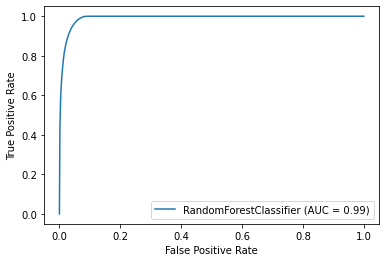

In [ ]:
# Plot ROC curve and calculate the AUC (Area under the Curve) metric
plot_roc_curve(clf, X_test, y_test)

In [ ]:
#  Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[107268   9035]
 [   774 233552]]


In [ ]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.99      0.92      0.96    116303
        True       0.96      1.00      0.98    234326

    accuracy                           0.97    350629
   macro avg       0.98      0.96      0.97    350629
weighted avg       0.97      0.97      0.97    350629



#### Calculate evaluation metrics using cross-validation
#### Calculating accuracy, precision, recall, f1 score of our model using cross-validation

In [ ]:
# Cross-validated precision for the entire dataset
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')

In [ ]:
# Precision
cv_precision = np.mean(cv_precision)
cv_precision

0.9607896717943172

In [ ]:
# Cross-validated accuracy for the entire dataset
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [ ]:
# Accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.969826243789571

In [ ]:
# Cross-validated recall for the entire dataset
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')

In [ ]:
# Recall
cv_recall = np.mean(cv_recall)
cv_recall

0.9962190396061532

In [ ]:
# Cross-validated f1 score for the entire dataset
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')

In [ ]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.978048670457154

In [ ]:
#predictions_file = open("predictions.txt", "w")
#text = y_preds
#print(text, file=predictions_file)
#predictions_file.close()

#### Feature Importance
* Which Features contribute the most to the outcome of the model and how did they contribute

In [ ]:
oaf.head()

,DimSeasonID,CountryName,SeasonName,Facilitator,DimClientID,DimGroupID,DimSiteID,DimDistrictID,TotalCredit,OperationalYear,...,NumberUndeliveredInput,NumberDeliveredInput,Active,DaysToSeasonEnd,Repaid,MaximumPaymentAmount,AveragePaymentAmount,TotalPaid,PercentagePaid,DistinctRepaymentPhoneNumbers
0,13,Kenya,"2017, Long Rain",False,487378,78077,2591,45,7675.0,2017,...,0.0,9.0,False,132.0,True,600.0,313.636364,3450.0,0.449511,1.0
2,13,Kenya,"2017, Long Rain",False,1482338,133995,4497,78,6185.0,2017,...,0.0,6.0,False,132.0,True,1000.0,670.600000,3353.0,0.542118,1.0
4,13,Kenya,"2017, Long Rain",False,3196771,115056,3934,64,16470.0,2017,...,0.0,12.0,False,132.0,True,1500.0,392.941176,6680.0,0.405586,1.0
6,13,Kenya,"2017, Long Rain",False,3402033,113828,3951,64,17465.0,2017,...,0.0,13.0,False,132.0,True,1000.0,516.666667,4650.0,0.266247,1.0
7,13,Kenya,"2017, Long Rain",False,1643911,108770,3765,61,4285.0,2017,...,0.0,8.0,False,132.0,True,1000.0,400.000000,2000.0,0.466744,1.0


In [ ]:
clf.feature_importances_

array([1.09517378e-03, 1.59128664e-02, 3.69026666e-01, 0.00000000e+00,
       4.77466339e-03, 1.34519573e-02, 1.33553329e-02, 1.14355981e-02,
       7.37279427e-03, 1.15608015e-02, 2.13209899e-03, 2.88257793e-03,
       2.87205181e-03, 1.01215905e-03, 0.00000000e+00, 4.84514288e-02,
       2.40694777e-02, 3.60027241e-03, 1.42227641e-02, 1.07275826e-03,
       1.68285905e-03, 1.34738114e-03, 3.13269277e-04, 1.89511178e-04,
       1.15761624e-04, 2.55644086e-05, 1.15398758e-04, 1.29624730e-03,
       3.47899748e-03, 1.35925265e-02, 2.93956742e-01, 0.00000000e+00,
       9.30896647e-03, 1.22671846e-02, 1.89511082e-02, 5.36024471e-02,
       4.14545926e-02])

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index =X_train.columns).sort_values(ascending=True)
feature_scores

HasPhone                          0.000000
DaysToSeasonEnd                   0.000000
Travertine                        0.000000
BeanSeed                          0.000026
Chicken                           0.000115
VeggieSeed                        0.000116
InputKGs                          0.000190
JiT                               0.000313
Fertilizer                        0.001012
Safety                            0.001073
Facilitator                       0.001095
Phone                             0.001296
Maize                             0.001347
PostHarvest                       0.001683
SeasonsAsFacilitator              0.002132
SeasonNumber                      0.002872
NumberOfPreviousSeasonsDropped    0.002883
NumberUndeliveredInput            0.003479
Solar                             0.003600
Facilitator_SeasonNumber          0.004775
Group_MaxSeasonNumber             0.007373
MaximumPaymentAmount              0.009309
Group_TotalCredit                 0.011436
Group_Numbe

<AxesSubplot:>

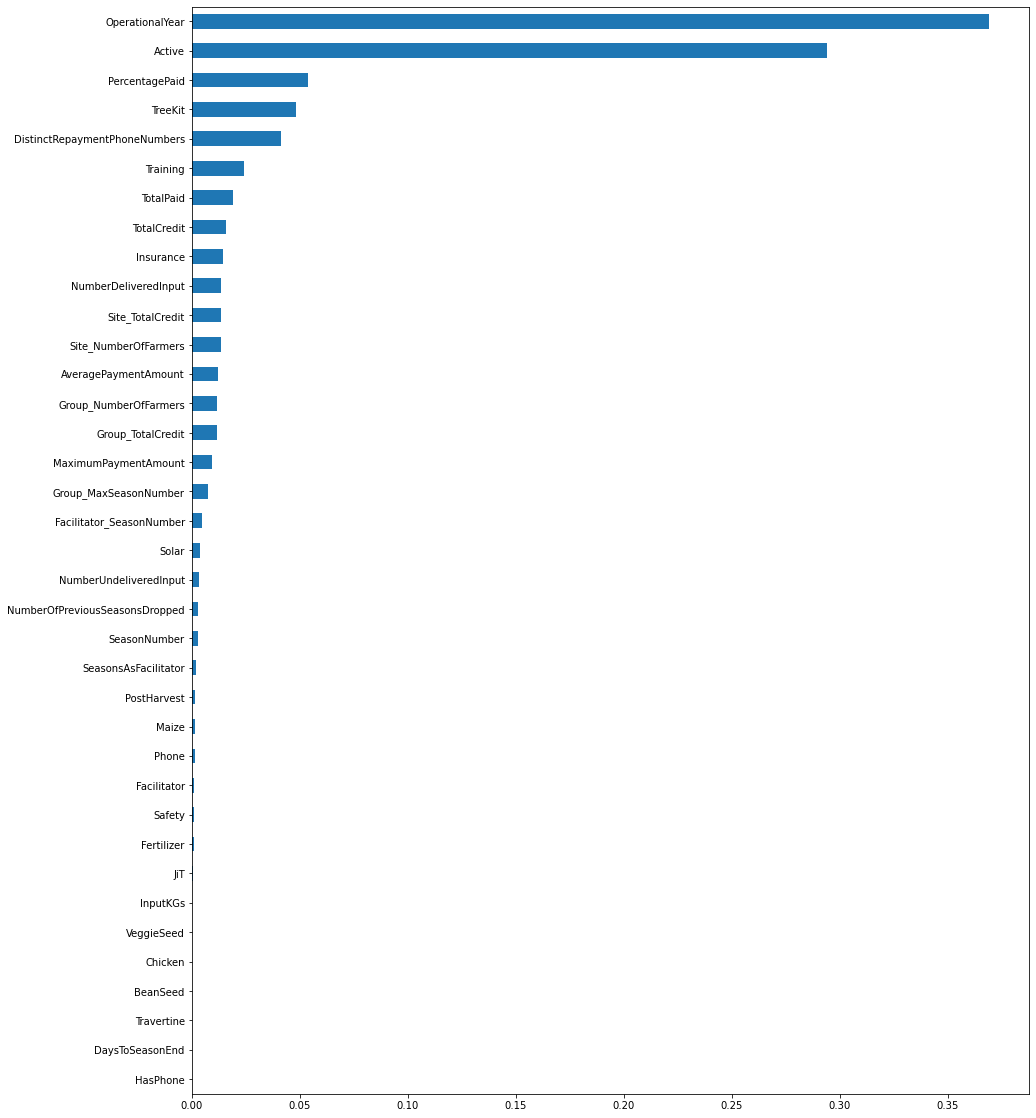

In [ ]:
feature_scores.plot.barh(figsize = (15,20))

In [ ]:
oaf.DistinctRepaymentPhoneNumbers.value_counts()

0.0     429560
1.0     334816
2.0     220146
3.0     115951
4.0      45098
5.0      15364
6.0       5113
7.0       1728
8.0        602
9.0        228
10.0        89
11.0        33
12.0        17
13.0         7
15.0         3
14.0         2
16.0         2
20.0         1
17.0         1
18.0         1
19.0         1
Name: DistinctRepaymentPhoneNumbers, dtype: int64

In [ ]:
file = open('predictions.txt','w+')
# saving the predictions into a text file
content = str(y_preds)
file.write(content)
file.close()

# diplaying the contents of the text file
file = open('predictions.txt','r')
content = file.read()
print(content)

[ True False  True ...  True  True  True]


In [ ]:
# Save the model and load it
import pickle
pickle.dump(clf,open("oaf_random_forest_model.pkl","wb"))